## Problem Statement

BoomBikes aspires to understand the demand for shared bikes among the people after the ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands.

## Business Goal

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

### Reading and Understanding the data

In [3]:
# reading the dataset

biking = pd.read_csv('day.csv')
biking

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
# inspecting the dataframe

biking.shape

(730, 16)

In [5]:
# inspecting the columns of the dataframe

biking.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
# inspecting the dataframe

biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# inspecting the dataframe

biking.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# inspecting the dtypes

biking.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Data Cleaning

* Inspecting the null values

In [9]:
# inspecting the column-wise null count

biking.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**There are no missing values present in the dataframe.**

* Dropping the unnecessary columns

In [10]:
# dropping instant and dteday columns

biking.drop(['instant','dteday'],axis = 1,inplace = True)
biking

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [11]:
# dropping casual and registered columns
# as cnt is the summation of casual and registered

biking.drop(['casual','registered'],axis = 1,inplace = True)
biking

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


* Converting columns to categorical string values.

In [12]:
# converting season to categorical string values

def season(x):
    if x == 1: return 'Spring'
    elif x == 2: return 'Summer'
    elif x == 3: return 'Fall'
    else: return 'Winter'
biking['season'] = biking['season'].apply(season)
biking['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [13]:
# converting mnth to categorical string values

def month(x):
    if x == 1: return 'Jan'
    elif x == 2: return 'Feb'
    elif x == 3: return 'March'
    elif x == 4: return 'April'
    elif x == 5: return 'May'
    elif x == 6: return 'June'
    elif x == 7: return 'July'
    elif x == 8: return 'Aug'
    elif x == 9: return 'Sep'
    elif x == 10: return 'Oct'
    elif x == 11: return 'Nov'
    else: return 'Dec'
    
biking['mnth'] = biking['mnth'].apply(month)
biking['mnth'].value_counts()

Dec      62
July     62
March    62
Jan      62
Aug      62
Oct      62
May      62
June     60
April    60
Nov      60
Sep      60
Feb      56
Name: mnth, dtype: int64

In [14]:
# converting weathersit to categorical string values

def weather(x):
    if x == 1: return 'Clear'
    elif x == 2: return 'Cloudy'
    elif x == 3: return 'Light rain'
    else: return 'Heavy rain'
biking['weathersit'] = biking['weathersit'].apply(weather)
biking['weathersit'].value_counts()

Clear         463
Cloudy        246
Light rain     21
Name: weathersit, dtype: int64

In [15]:
# converting weekday to categorical string values

def week(x):
    if x == 0: return 'Sun'
    elif x == 1: return 'Mon'
    elif x == 2: return 'Tue'
    elif x == 3: return 'Wed'
    elif x == 4: return 'Thu'
    elif x == 5: return 'Fri'
    else: return 'Sat'
    
biking['weekday'] = biking['weekday'].apply(week)
biking['weekday'].value_counts()

Mon    105
Sun    105
Sat    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

In [16]:
biking

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,Dec,0,Thu,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,Dec,0,Fri,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,Dec,0,Sat,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,Dec,0,Sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [17]:
# inspecting the dtypes again

biking.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

### Visualizing the data

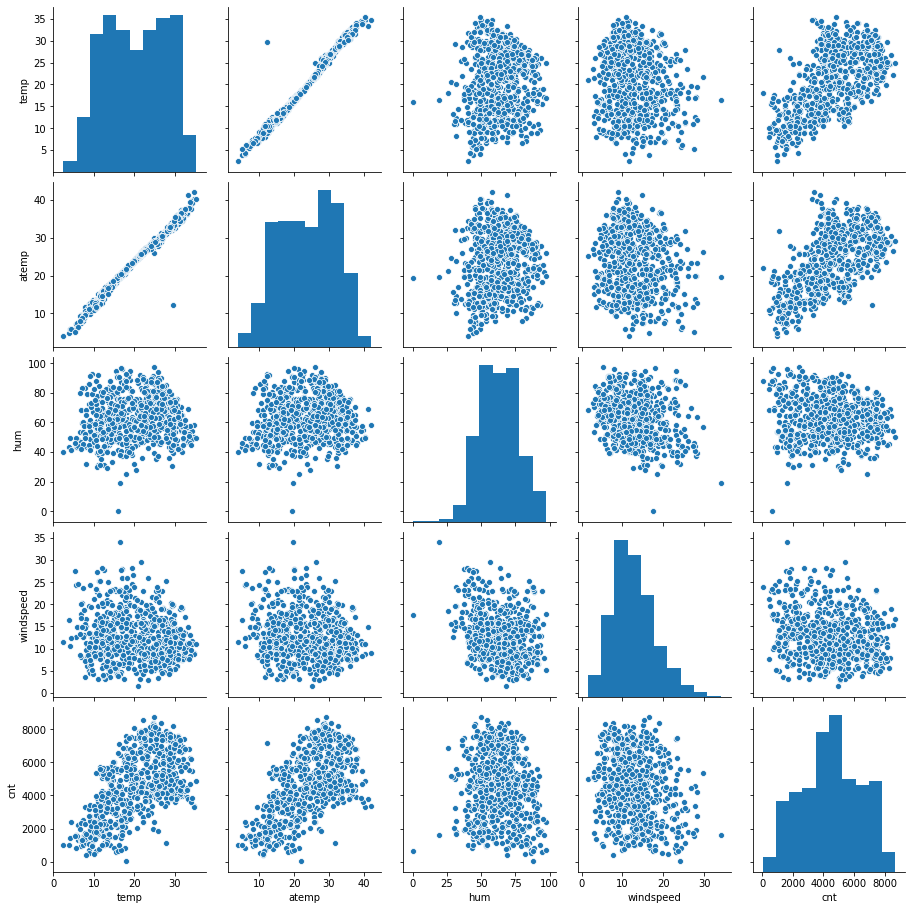

In [18]:
# visualizing the numerical variables

varlist = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(biking[varlist])

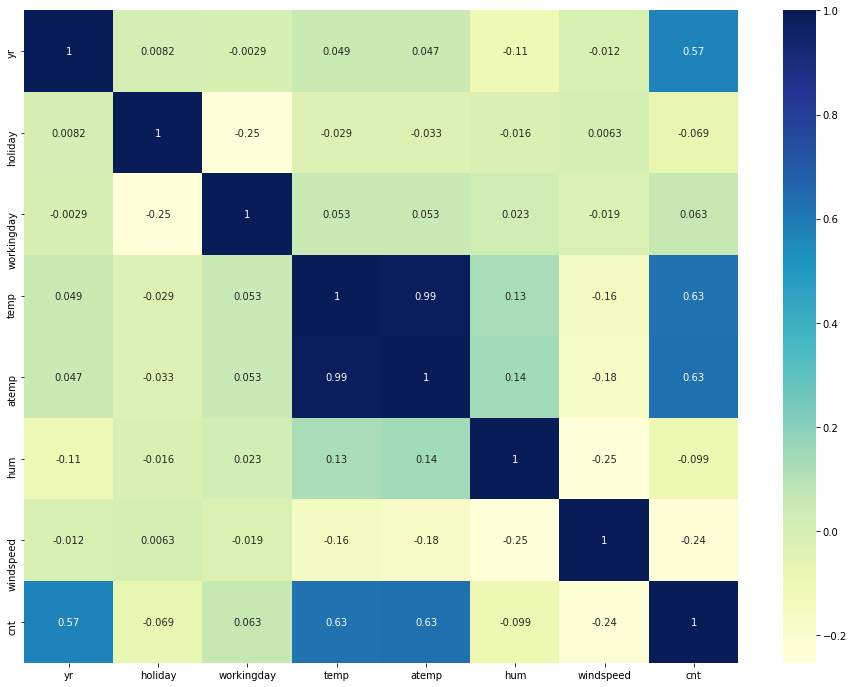

In [19]:
# another quick way to visualize the data is heatmap

plt.figure(figsize = (16,12))
sns.heatmap(biking.corr(),cmap = 'YlGnBu',annot = True)

The variables temp and atemp are highly correlated.

There is a high positive correlation between the target variable cnt and the temp variable i.e. 0.63 

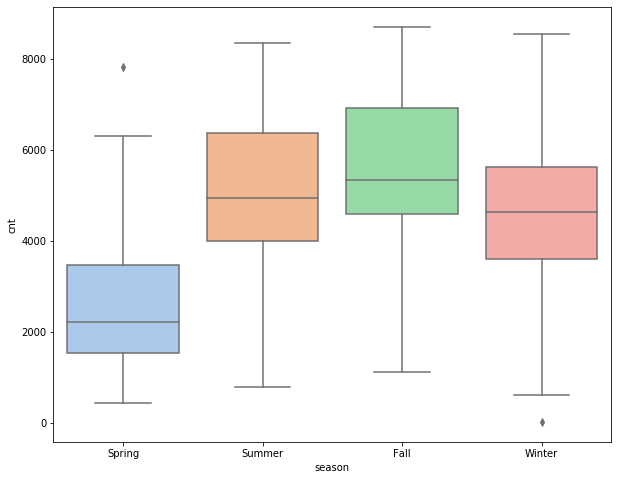

In [20]:
# visualizing the season variable

plt.figure(figsize = (10,8))
sns.boxplot(x = 'season', y = 'cnt', data = biking,palette = 'pastel')

From the above plot we can infer that users prefer to rent a bike in the summer season or in the fall season.

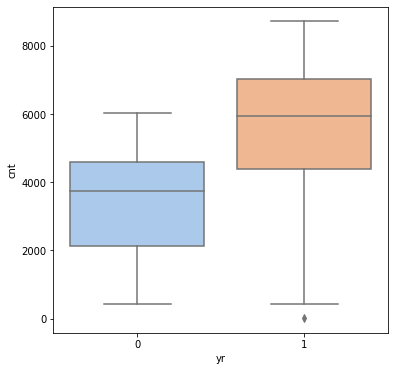

In [21]:
# visualizing the yr variable

plt.figure(figsize = (6,6))
sns.boxplot(x = 'yr', y = 'cnt', data = biking,palette = 'pastel')

We can see a tremendous growth in the number of bikes rented in the year 2019 as compared to 2018 which makes sense since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year.

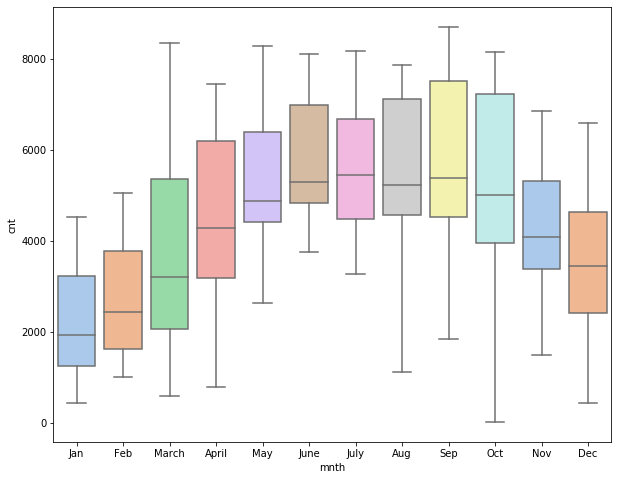

In [22]:
# visualizing the mnth variable

plt.figure(figsize = (10,8))
sns.boxplot(x = 'mnth', y = 'cnt', data = biking,palette = 'pastel')

The mnth variable follows a similar trend as does the season varaible.

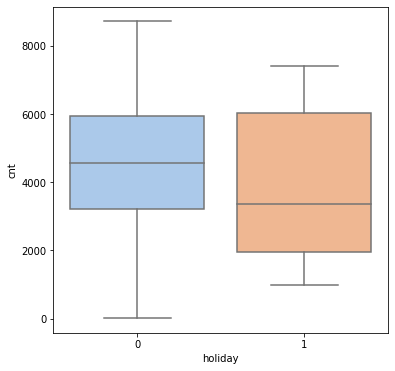

In [23]:
# visualizing the holiday variable

plt.figure(figsize = (6,6))
sns.boxplot(x = 'holiday', y = 'cnt', data = biking,palette = 'pastel')

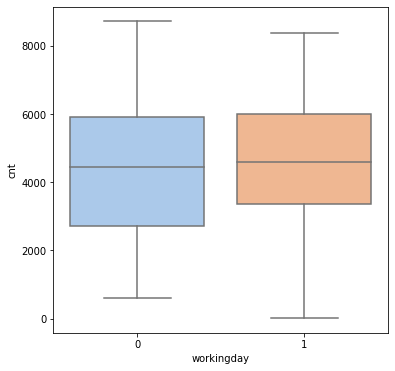

In [24]:
# visualizing the workingday variable

plt.figure(figsize = (6,6))
sns.boxplot(x = 'workingday', y = 'cnt', data = biking,palette = 'pastel')

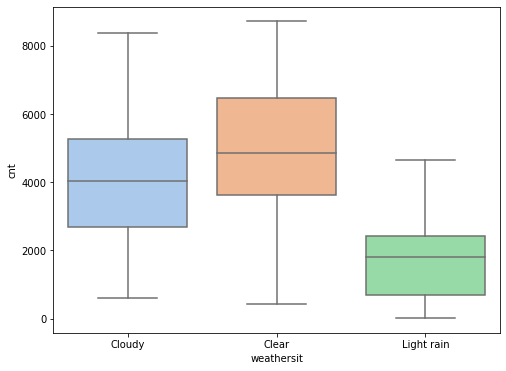

In [25]:
# visualizing the weathersit variable

plt.figure(figsize = (8,6))
sns.boxplot(x = 'weathersit', y = 'cnt', data = biking,palette = 'pastel')

We can see that the users prefer to rent a bike when it is either clear or cloudy.

We can also visualize some of these categorical features parallely by using the hue argument.

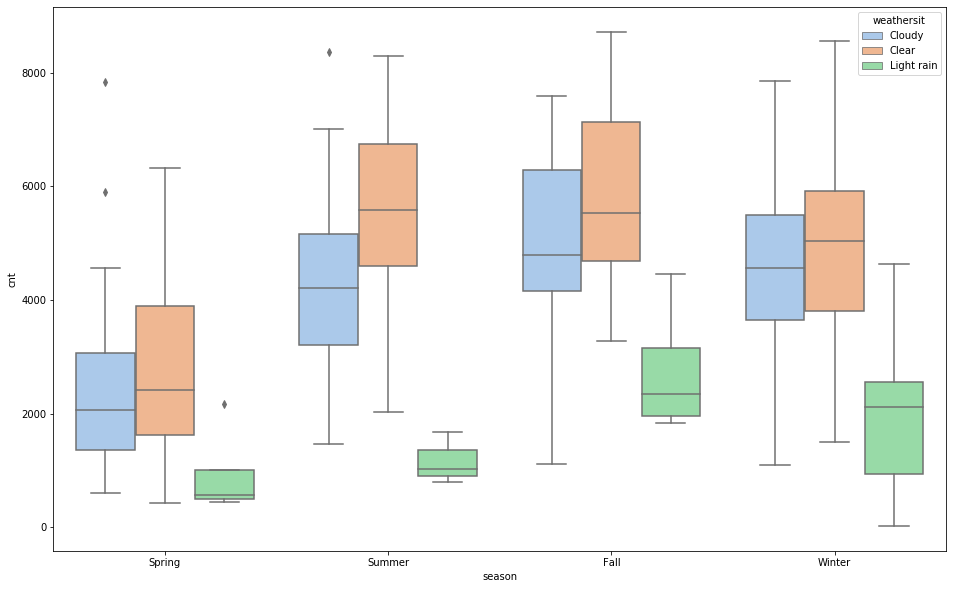

In [26]:
plt.figure(figsize = (16,10))
sns.boxplot(x = 'season',y = 'cnt',hue = 'weathersit',data = biking,palette = 'pastel')

**From the above plots we can infer that users prefer to rent a bike in the summer season or in the fall season when the weather is either clear or cloudy.**

### Preparing the data for modeling

* Creating dummy variables for all the categorical features.

In [27]:
# creating dummy variables for season

status = pd.get_dummies(biking['season'])
status

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


Now, we don't need four columns. We can drop the Fall column, as the type of season can be identified with just the last three columns.

In [28]:
# dropping the Fall dummy variable

status = pd.get_dummies(biking['season'],drop_first = True)
status

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [29]:
# concatenating the two dataframes

biking = pd.concat([biking,status],axis = 1)
biking

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,Spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,Dec,0,Thu,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114,1,0,0
726,Spring,1,Dec,0,Fri,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095,1,0,0
727,Spring,1,Dec,0,Sat,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341,1,0,0
728,Spring,1,Dec,0,Sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796,1,0,0


In [30]:
# dropping the season column as we have created dummies for it

biking.drop('season',axis = 1,inplace = True)
biking

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,Dec,0,Thu,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114,1,0,0
726,1,Dec,0,Fri,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095,1,0,0
727,1,Dec,0,Sat,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341,1,0,0
728,1,Dec,0,Sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796,1,0,0


In [31]:
# creating dummy variables for mnth

status = pd.get_dummies(biking['mnth'],drop_first = True)
status

,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [32]:
# concatenating the two dataframes

biking = pd.concat([biking,status],axis = 1)
biking

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,Dec,0,Thu,1,Cloudy,10.420847,11.33210,65.2917,23.458911,...,1,0,0,0,0,0,0,0,0,0
726,1,Dec,0,Fri,1,Cloudy,10.386653,12.75230,59.0000,10.416557,...,1,0,0,0,0,0,0,0,0,0
727,1,Dec,0,Sat,0,Cloudy,10.386653,12.12000,75.2917,8.333661,...,1,0,0,0,0,0,0,0,0,0
728,1,Dec,0,Sun,0,Clear,10.489153,11.58500,48.3333,23.500518,...,1,0,0,0,0,0,0,0,0,0


In [33]:
# dropping the mnth column as we have created dummies for it

biking.drop('mnth',axis = 1,inplace = True)
biking

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,0,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,Thu,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114,...,1,0,0,0,0,0,0,0,0,0
726,1,0,Fri,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095,...,1,0,0,0,0,0,0,0,0,0
727,1,0,Sat,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341,...,1,0,0,0,0,0,0,0,0,0
728,1,0,Sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796,...,1,0,0,0,0,0,0,0,0,0


In [34]:
# creating dummy variables for weekday

status = pd.get_dummies(biking['weekday'],drop_first = True)
status

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [35]:
# concatenating the two dataframes

biking = pd.concat([biking,status],axis = 1)
biking

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,1,0,0,0,0
1,0,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,1,0,0,0
2,0,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,1,0,0,0,0,0
3,0,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,1,0
4,0,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,Thu,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114,...,0,0,0,0,0,0,0,1,0,0
726,1,0,Fri,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095,...,0,0,0,0,0,0,0,0,0,0
727,1,0,Sat,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341,...,0,0,0,0,0,1,0,0,0,0
728,1,0,Sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796,...,0,0,0,0,0,0,1,0,0,0


In [36]:
# dropping the weekday column as we have created dummies for it

biking.drop('weekday',axis = 1,inplace = True)
biking

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114,1,...,0,0,0,0,0,0,0,1,0,0
726,1,0,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095,1,...,0,0,0,0,0,0,0,0,0,0
727,1,0,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,Clear,10.489153,11.58500,48.3333,23.500518,1796,1,...,0,0,0,0,0,0,1,0,0,0


In [37]:
# creating dummy variables for weathersit

status = pd.get_dummies(biking['weathersit'],drop_first = True)
status

,Cloudy,Light rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [38]:
# concatenating the two dataframes

biking = pd.concat([biking,status],axis = 1)
biking

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light rain
0,0,0,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114,1,...,0,0,0,0,0,1,0,0,1,0
726,1,0,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095,1,...,0,0,0,0,0,0,0,0,1,0
727,1,0,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341,1,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,Clear,10.489153,11.58500,48.3333,23.500518,1796,1,...,0,0,0,0,1,0,0,0,0,0


In [39]:
# dropping the weathersit column as we have created dummies for it

biking.drop('weathersit',axis = 1,inplace = True)
biking

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,...,0,0,0,0,0,1,0,0,1,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,...,0,0,0,0,0,0,0,0,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0


* Train-Test split

In [40]:
# train test split
# we specify numpy seed so that the train and test set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(biking,train_size = 0.7,random_state = 100)

* Scaling the variables

In [41]:
# scaling the variables
# instantiating the object

scaler = MinMaxScaler()

In [42]:
# applying scaler to all the variables except the '1/0' and 'dummy' variables
# we fit and transform on the train set

numvars = ['temp','atemp','hum','windspeed','cnt']
df_train[numvars] = scaler.fit_transform(df_train[numvars])
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light rain
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0.832835,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0.218017,1,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0.312586,0,0,...,0,0,0,1,0,0,0,0,1,0
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0.236424,0,1,...,0,0,1,0,0,0,0,0,1,0


In [43]:
# we never fit on test set

df_test[numvars] = scaler.transform(df_test[numvars])
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light rain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,0,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0.495973,0,1,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0.868615,0,0,...,1,0,0,0,0,0,0,1,1,0
72,0,0,1,0.331557,0.332005,0.512107,0.203418,0.232858,1,0,...,0,0,1,0,0,0,0,0,0,0


* Dividing into X and y

In [44]:
X_train = df_train.drop('cnt',axis = 1)
y_train = df_train['cnt']

### Training the model

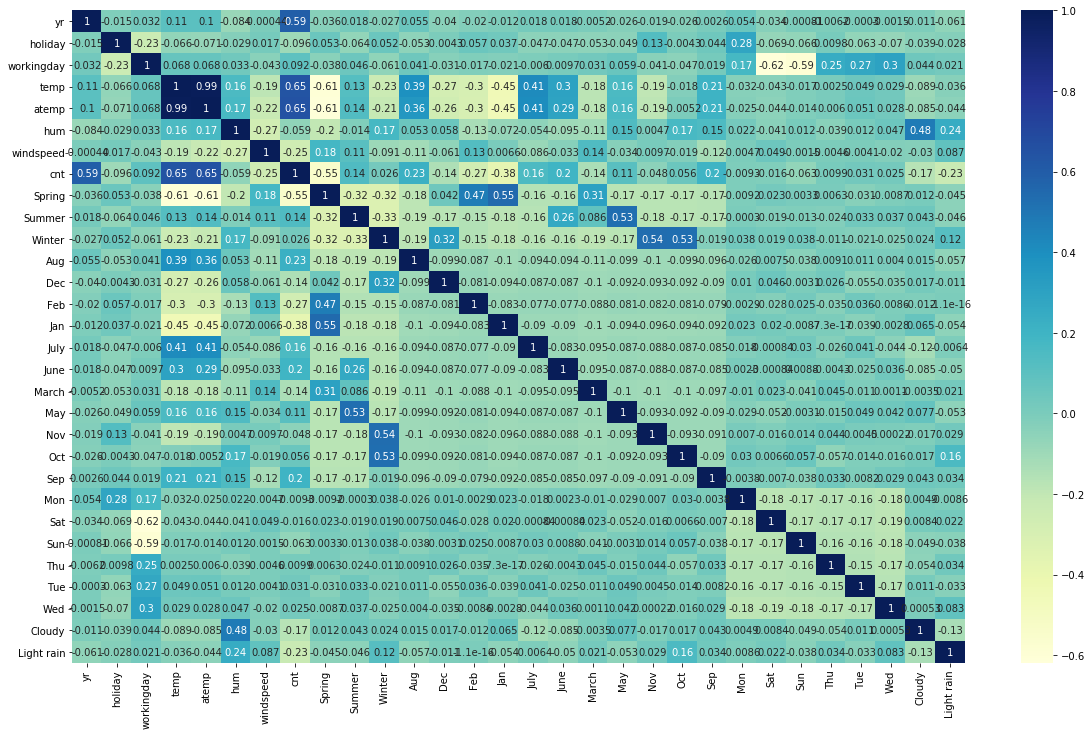

In [45]:
# let's check the heatmap to see which variables are highly correlated

plt.figure(figsize = (20,12))
sns.heatmap(df_train.corr(),cmap = 'YlGnBu',annot = True)

* Recursive feature elimination

In [46]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# running RFE with the output number of the variable equal to 15

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Cloudy', True, 1),
 ('Light rain', True, 1)]

In [49]:
# columns selected by rfe

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'July', 'Sep', 'Sat', 'Cloudy',
       'Light rain'],
      dtype='object')

* Building model using statsmodels, for the detailed statistics

In [50]:
# creating the first model

X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          4.22e-191
Time:                        08:39:05   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.000       0.181       0.323
yr             0.2305      0.008     28.795      0.000       0.215       0.246
holiday       -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday     0.0433      0.012      3.762      0.000       0.021       0.066
temp           0.5096      0.034     14.837      0.000       0.442       0.577
hum           -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed     -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Spring        -0.0509      0.021     -2.464      0.014      -0.091      -0.010
Summer         0.0508      0.015      3.423      0.001       0.022       0.080
Winter         0.0933      0.017      5.403      0.000       0.059       0.127
Jan           -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July          -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep            0.0814      0.016      4.945      0.000       0.049       0.114
Sat            0.0536      0.014      3.694      0.000       0.025       0.082
Cloudy        -0.0563      0.010     -5.439      0.000      -0.077      -0.036
Light rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have an Adj. R-squared value of 0.844 but the feature Jan came out to be insignificant with a p-value of 0.047

Let's check the VIF values of these features.

In [51]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,Spring,4.53
8,Winter,3.46
7,Summer,2.85
13,Cloudy,2.29
0,yr,2.09
12,Sat,1.98


The variable hum is highly correlated with other variables.

In [52]:
# dropping the variable Jan
# creating the second model

X_train_rfe = X_train_rfe.drop('Jan',axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_sm).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          2.11e-191
Time:                        08:39:05   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2402      0.036      6.714      0.000       0.170       0.310
yr             0.2298      0.008     28.647      0.000       0.214       0.246
holiday       -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday     0.0430      0.012      3.725      0.000       0.020       0.066
temp           0.5277      0.033     15.884      0.000       0.462       0.593
hum           -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
Spring        -0.0555      0.021     -2.698      0.007      -0.096      -0.015
Summer         0.0537      0.015      3.631      0.000       0.025       0.083
Winter         0.0992      0.017      5.815      0.000       0.066       0.133
July          -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep            0.0820      0.017      4.966      0.000       0.050       0.114
Sat            0.0530      0.015      3.648      0.000       0.024       0.082
Cloudy        -0.0563      0.010     -5.425      0.000      -0.077      -0.036
Light rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have an Adj. R-squared value of 0.843 which is pretty much the same but the variable holiday has a p-value of 0.029

Let's check the VIF values of these features.

In [53]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
6,Spring,4.24
8,Winter,3.42
7,Summer,2.85
12,Cloudy,2.29
0,yr,2.08
11,Sat,1.97


In [54]:
# dropping the variable holiday
# creating the third model

X_train_rfe = X_train_rfe.drop('holiday',axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_sm).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          1.54e-191
Time:                        08:39:05   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2307      0.036      6.472      0.000       0.161       0.301
yr             0.2300      0.008     28.568      0.000       0.214       0.246
workingday     0.0518      0.011      4.764      0.000       0.030       0.073
temp           0.5278      0.033     15.827      0.000       0.462       0.593
hum           -0.1594      0.037     -4.253      0.000      -0.233      -0.086
windspeed     -0.1815      0.026     -7.114      0.000      -0.232      -0.131
Spring        -0.0566      0.021     -2.740      0.006      -0.097      -0.016
Summer         0.0541      0.015      3.640      0.000       0.025       0.083
Winter         0.0983      0.017      5.738      0.000       0.065       0.132
July          -0.0535      0.018     -2.946      0.003      -0.089      -0.018
Sep            0.0799      0.017      4.831      0.000       0.047       0.112
Sat            0.0619      0.014      4.420      0.000       0.034       0.089
Cloudy        -0.0561      0.010     -5.379      0.000      -0.077      -0.036
Light rain    -0.2442      0.026     -9.330      0.000      -0.296      -0.193
==============================================================================
Omnibus:                       71.537   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.647
Skew:                          -0.709   Prob(JB):                     1.32e-40
Kurtosis:                       5.576   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have an Adj. R-squared value of 0.841 with all the features being significant.

Let's check the VIF values of these features.

In [55]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.38
2,temp,16.88
1,workingday,4.72
4,windspeed,4.70
5,Spring,4.18
7,Winter,3.39
6,Summer,2.84
11,Cloudy,2.28
0,yr,2.08
10,Sat,1.84


The VIF value of hum is 28.38 which is not acceptable.

In [56]:
# dropping the variable hum
# creating the fourth model

X_train_rfe = X_train_rfe.drop('hum',axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_sm).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          7.12e-189
Time:                        08:39:06   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1492      0.031      4.881      0.000       0.089       0.209
yr             0.2339      0.008     28.756      0.000       0.218       0.250
workingday     0.0545      0.011      4.938      0.000       0.033       0.076
temp           0.4920      0.033     14.991      0.000       0.427       0.556
windspeed     -0.1499      0.025     -6.040      0.000      -0.199      -0.101
Spring        -0.0664      0.021     -3.182      0.002      -0.107      -0.025
Summer         0.0481      0.015      3.196      0.001       0.019       0.078
Winter         0.0838      0.017      4.910      0.000       0.050       0.117
July          -0.0486      0.018     -2.637      0.009      -0.085      -0.012
Sep            0.0740      0.017      4.414      0.000       0.041       0.107
Sat            0.0664      0.014      4.671      0.000       0.038       0.094
Cloudy        -0.0817      0.009     -9.428      0.000      -0.099      -0.065
Light rain    -0.2883      0.024    -11.795      0.000      -0.336      -0.240
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have an Adj. R-squared value of 0.836 with all the features being significant.

Let's check the VIF values of these features.

In [57]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,Spring,2.38
5,Summer,2.32
0,yr,2.07
6,Winter,1.91
9,Sat,1.83
7,July,1.58
10,Cloudy,1.57


The VIF value of temp is 6.73 which means temp has some correlation with other variables.

In [58]:
# dropping the variable temp
# creating the fifth model

X_train_rfe = X_train_rfe.drop('temp',axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_sm).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     149.4
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          6.65e-150
Time:                        08:39:06   Log-Likelihood:                 410.88
No. Observations:                 510   AIC:                            -797.8
Df Residuals:                     498   BIC:                            -746.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5334      0.020     26.559      0.000       0.494       0.573
yr             0.2475      0.010     25.428      0.000       0.228       0.267
workingday     0.0561      0.013      4.222      0.000       0.030       0.082
windspeed     -0.1722      0.030     -5.772      0.000      -0.231      -0.114
Spring        -0.3001      0.017    -17.948      0.000      -0.333      -0.267
Summer        -0.0435      0.017     -2.629      0.009      -0.076      -0.011
Winter        -0.0774      0.016     -4.855      0.000      -0.109      -0.046
July          -0.0089      0.022     -0.407      0.684      -0.052       0.034
Sep            0.0698      0.020      3.459      0.001       0.030       0.109
Sat            0.0637      0.017      3.725      0.000       0.030       0.097
Cloudy        -0.0910      0.010     -8.747      0.000      -0.111      -0.071
Light rain    -0.3000      0.029    -10.200      0.000      -0.358      -0.242
==============================================================================
Omnibus:                       32.604   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.659
Skew:                          -0.355   Prob(JB):                     4.54e-16
Kurtosis:                       4.680   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping the variable temp has significantly reduced our Adj. R-squared to 0.762 which makes sense as the target variable cnt has a positive correlation with temp.

Let's try dropping workingday instead of temp and then look at the VIF values.

In [59]:
# adding the variable temp
# dropping the variable workingday
# creating the sixth model

X_train_rfe['temp'] = df_train['temp'] 
X_train_rfe = X_train_rfe.drop('workingday',axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_sm).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.2
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          6.54e-185
Time:                        08:39:06   Log-Likelihood:                 493.80
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     498   BIC:                            -912.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1935      0.030      6.468      0.000       0.135       0.252
yr             0.2344      0.008     28.168      0.000       0.218       0.251
windspeed     -0.1519      0.025     -5.982      0.000      -0.202      -0.102
Spring        -0.0693      0.021     -3.244      0.001      -0.111      -0.027
Summer         0.0472      0.015      3.070      0.002       0.017       0.077
Winter         0.0791      0.017      4.537      0.000       0.045       0.113
July          -0.0515      0.019     -2.734      0.006      -0.089      -0.015
Sep            0.0733      0.017      4.271      0.000       0.040       0.107
Sat            0.0229      0.011      2.006      0.045       0.000       0.045
Cloudy        -0.0787      0.009     -8.897      0.000      -0.096      -0.061
Light rain    -0.2807      0.025    -11.246      0.000      -0.330      -0.232
temp           0.4935      0.034     14.698      0.000       0.428       0.560
==============================================================================
Omnibus:                       76.531   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.911
Skew:                          -0.792   Prob(JB):                     3.84e-39
Kurtosis:                       5.412   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have an Adj. R-squared value of 0.828 with Sat having a p-value of 0.045

Let's check the VIF values of these features.

In [60]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.12
1,windspeed,4.62
3,Summer,2.23
2,Spring,2.08
0,yr,2.07
4,Winter,1.78
5,July,1.58
8,Cloudy,1.55
6,Sep,1.33
7,Sat,1.18


In [61]:
# dropping the variable Sat
# creating the seventh model

X_train_rfe = X_train_rfe.drop('Sat',axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_sm).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          3.00e-185
Time:                        08:39:06   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1974      0.030      6.593      0.000       0.139       0.256
yr             0.2339      0.008     28.037      0.000       0.218       0.250
windspeed     -0.1496      0.025     -5.880      0.000      -0.200      -0.100
Spring        -0.0696      0.021     -3.247      0.001      -0.112      -0.027
Summer         0.0469      0.015      3.038      0.003       0.017       0.077
Winter         0.0792      0.017      4.527      0.000       0.045       0.114
July          -0.0510      0.019     -2.697      0.007      -0.088      -0.014
Sep            0.0734      0.017      4.263      0.000       0.040       0.107
Cloudy        -0.0785      0.009     -8.851      0.000      -0.096      -0.061
Light rain    -0.2800      0.025    -11.186      0.000      -0.329      -0.231
temp           0.4920      0.034     14.611      0.000       0.426       0.558
==============================================================================
Omnibus:                       69.942   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.479
Skew:                          -0.711   Prob(JB):                     9.57e-38
Kurtosis:                       5.450   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have an Adj. R-squared value of 0.827 with all the features being significant.

Let's check the VIF values of these features.

In [62]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
1,windspeed,4.60
3,Summer,2.23
0,yr,2.07
2,Spring,2.07
4,Winter,1.77
5,July,1.58
7,Cloudy,1.55
6,Sep,1.33
8,Light rain,1.08


The variables temp and windspeed have high VIF values.

In [63]:
# dropping the variable windspeed
# creating the eighth model

X_train_rfe = X_train_rfe.drop('windspeed',axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_sm).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.3
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          3.15e-179
Time:                        08:39:07   Log-Likelihood:                 474.67
No. Observations:                 510   AIC:                            -929.3
Df Residuals:                     500   BIC:                            -887.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1474      0.030      4.971      0.000       0.089       0.206
yr             0.2330      0.009     27.033      0.000       0.216       0.250
Spring        -0.0792      0.022     -3.588      0.000      -0.123      -0.036
Summer         0.0369      0.016      2.331      0.020       0.006       0.068
Winter         0.0802      0.018      4.442      0.000       0.045       0.116
July          -0.0512      0.020     -2.623      0.009      -0.090      -0.013
Sep            0.0776      0.018      4.372      0.000       0.043       0.113
Cloudy        -0.0767      0.009     -8.378      0.000      -0.095      -0.059
Light rain    -0.2948      0.026    -11.459      0.000      -0.345      -0.244
temp           0.5040      0.035     14.519      0.000       0.436       0.572
==============================================================================
Omnibus:                       72.225   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.589
Skew:                          -0.730   Prob(JB):                     2.74e-39
Kurtosis:                       5.496   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have an Adj. R-squared value of 0.816 with Summer having a p-value of 0.020

Let's check the VIF values of these features.

In [64]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,4.21
0,yr,2.06
2,Summer,1.94
4,July,1.58
3,Winter,1.56
6,Cloudy,1.55
1,Spring,1.38
5,Sep,1.33
7,Light rain,1.06


In [65]:
# dropping the variable summer
# creating the ninth model

X_train_rfe = X_train_rfe.drop('Summer',axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_sm).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.5
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          2.70e-179
Time:                        08:39:07   Log-Likelihood:                 471.91
No. Observations:                 510   AIC:                            -925.8
Df Residuals:                     501   BIC:                            -887.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1928      0.022      8.591      0.000       0.149       0.237
yr             0.2336      0.009     26.994      0.000       0.217       0.251
Spring        -0.1150      0.016     -7.241      0.000      -0.146      -0.084
Winter         0.0505      0.013      3.929      0.000       0.025       0.076
July          -0.0680      0.018     -3.730      0.000      -0.104      -0.032
Sep            0.0617      0.016      3.748      0.000       0.029       0.094
Cloudy        -0.0764      0.009     -8.305      0.000      -0.094      -0.058
Light rain    -0.2952      0.026    -11.421      0.000      -0.346      -0.244
temp           0.4704      0.032     14.835      0.000       0.408       0.533
==============================================================================
Omnibus:                       72.193   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.649
Skew:                          -0.714   Prob(JB):                     4.86e-41
Kurtosis:                       5.587   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have an Adj. R-squared value of 0.814 with all the features being significant.

Let's check the VIF values of these features.

In [66]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,2.98
0,yr,2.05
5,Cloudy,1.51
3,July,1.33
2,Winter,1.31
1,Spring,1.23
4,Sep,1.18
6,Light rain,1.06


This model seems to be the best model with a R-squared value of 0.817 and an Adj. R-squared value of 0.814

### Residual Analysis

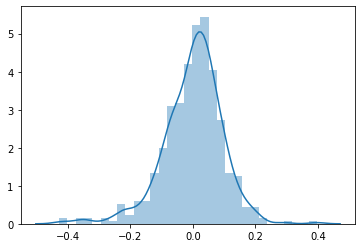

In [67]:
# to check if the error terms are normally distributed or not

y_train_pred = lm9.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

The error terms are normally distributed with mean 0.

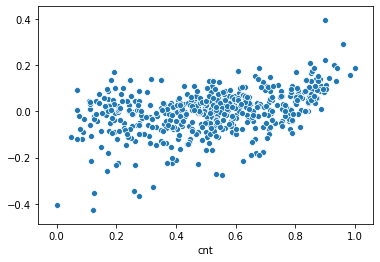

In [68]:
# to check if the error terms follow any visible pattern or not

sns.scatterplot(y_train,res)

The error terms are independent of each other and do not follow any visible pattern.

The assumptions of Linear Regression hold valid.

### Making predictions using lm9

In [69]:
X_test = df_test.drop('cnt',axis = 1)
y_test = df_test['cnt']

In [70]:
# adding a constant

X_test = X_test[X.columns]
X_test_sm = sm.add_constant(X_test)

In [71]:
# making predictions

y_pred = lm9.predict(X_test_sm)

In [72]:
# R-squared value of test set

r2 = r2_score(y_true = y_test,y_pred = y_pred)
r2

0.8092270264746744

In [73]:
# Adj. R-squared value of test set
# n = 220 and p = 8

Adj_r2 = 1-(1-r2)*(220-1)/(220-8-1)
Adj_r2

0.8019939279523871

We can see that the equation of our best fitted line is:

$ cnt = 0.1928 + 0.2336  \times  yr - 0.1150 \times Spring + 0.0505 \times Winter - 0.0680 \times July + 0.0617 \times Sep - 0.0764 \times Cloudy - 0.2952 \times Light rain + 0.4704 \times temp $

Analysing the final model, the comapny should focus on the following features:
* year: Since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year and thus the company should witness an increase in the number of users when the situation comes back to normal.
* season: The company should focus on expanding it's business in the Summer season and in the Fall season.
* weather: The users prefer to rent a bike when the weather is pleasant i.e. either clear or cloudy.
* temp: The users prefer to ride or rent a bike when the temperature is moderate.

Hence when the situation comes back to normal, the company may witness an increase in the business and should try expanding the business with new availing offers or schemes in the season of summer and fall when the weather is pleasant with clear sky and moderate temperature.